In [1]:
#import the modules
import os
import numpy as np
import pandas as pd
import plotly as plt 
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import matplotlib.pyplot as plt1

In [3]:
import time
import google.cloud
from datetime import datetime as dt

from google.cloud import bigtable
from google.cloud.bigtable import column_family
from google.cloud.bigtable import row_filters

In [4]:
INSTANCE_ID = 'bigtable-1'
TABLE_ID = 'workshop_{}'.format(time.time())

In [5]:
TABLE_ID

'workshop_1634868974.1706617'

In [7]:
client = bigtable.Client.from_service_account_json('../Data/fourth-silo-325712-d233370abdc0.json', admin = True)

In [8]:
print('Connecting to database instance')
instance = client.instance(INSTANCE_ID)

Connecting to database instance


In [9]:
print('Creating the {} table'.format(TABLE_ID))
table = instance.table(TABLE_ID)

if not table.exists():
    table.create()
else:
    print("ERROR: Table {} already exists".format(TABLE_ID))

Creating the workshop_1634868974.1706617 table


### Creacion CSV

In [10]:
plant1_pg = pd.read_csv("../Data/Plant_1_Generation_Data.csv")
plant2_pg = pd.read_csv("../Data/Plant_1_Weather_Sensor_Data.csv")
plant1_ws = pd.read_csv("../Data/Plant_2_Generation_Data.csv")
plant2_ws = pd.read_csv("../Data/Plant_2_Weather_Sensor_Data.csv")

#creando un mapa
files = {
    0: plant1_pg,
    1: plant1_ws,
    2: plant2_pg,
    3: plant2_ws,
}

In [11]:
#datos de generación de energía de la planta 1
files[0].sample(5)

,DATE_TIME,PLANT_ID,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
63445,15-06-2020 10:45,4135001,ih0vzX44oOqAx2f,11496.85714,1121.8000,2666.714286,6410349.714
61786,14-06-2020 16:00,4135001,McdE0feGgRqW7Ca,5907.25000,578.8750,6981.625000,7388904.625
36434,02-06-2020 13:45,4135001,1BY6WEcLGh8j5v7,12181.50000,1188.4125,4966.875000,6388405.875
39298,03-06-2020 22:45,4135001,3PZuoBAID5Wc2HD,0.00000,0.0000,7874.000000,7136488.000
52404,10-06-2020 05:15,4135001,sjndEbLyjtCKgGv,0.00000,0.0000,0.000000,7209095.000


In [12]:
#datos del sensor meteorológico de la planta 1
files[1].sample(5)

,DATE_TIME,PLANT_ID,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
22342,2020-05-27 00:15:00,4136001,4UPUqMRk7TRMgml,0.000000,0.00,9501.000000,2.516326e+06
15732,2020-05-23 04:15:00,4136001,q49J1IKaHRwDQnt,0.000000,0.00,9333.000000,3.835040e+05
64065,2020-06-16 06:30:00,4136001,vOuJvMaM2sgwLmb,72.866667,70.66,18.666667,2.417854e+06
40676,2020-06-05 04:45:00,4136001,oZZkBaNadn6DNKz,0.000000,0.00,0.000000,1.708216e+09
61308,2020-06-14 23:15:00,4136001,V94E5Ben1TlhnDV,0.000000,0.00,3304.000000,1.412280e+09


In [13]:
#datos de generación de energía de la planta 2
files[2].sample(6)

,DATE_TIME,PLANT_ID,SOURCE_KEY,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
2180,2020-06-07 13:30:00,4135001,HmiyD2TTLFNqkNe,29.890330,55.834263,0.832460
2310,2020-06-08 22:00:00,4135001,HmiyD2TTLFNqkNe,23.163002,20.393292,0.000000
1743,2020-06-03 00:00:00,4135001,HmiyD2TTLFNqkNe,23.157129,20.891465,0.000000
2871,2020-06-14 18:15:00,4135001,HmiyD2TTLFNqkNe,25.136102,24.723273,0.019034
735,2020-05-23 07:30:00,4135001,HmiyD2TTLFNqkNe,23.204710,27.907205,0.229117
1971,2020-06-05 09:15:00,4135001,HmiyD2TTLFNqkNe,26.326908,43.225736,0.661409


In [14]:
#datos del sensor meteorológico de la planta 2
files[3].sample(7)

,DATE_TIME,PLANT_ID,SOURCE_KEY,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
2284,2020-06-07 20:15:00,4136001,iq8k7ZNt4Mwm3w0,27.481502,26.081216,0.000000
1035,2020-05-25 19:15:00,4136001,iq8k7ZNt4Mwm3w0,33.980353,31.387653,0.000000
1458,2020-05-30 05:15:00,4136001,iq8k7ZNt4Mwm3w0,23.834682,22.318359,0.000000
3213,2020-06-17 12:30:00,4136001,iq8k7ZNt4Mwm3w0,28.204097,37.502086,0.470896
1137,2020-05-26 20:45:00,4136001,iq8k7ZNt4Mwm3w0,30.678416,29.306707,0.000000
2749,2020-06-12 16:30:00,4136001,iq8k7ZNt4Mwm3w0,27.547284,30.637098,0.156705
2992,2020-06-15 05:15:00,4136001,iq8k7ZNt4Mwm3w0,24.454231,23.661917,0.000000


### Inserting data de los csv cargados previamente

In [15]:
for i in range(len(files)):
    files[i]["DATE_TIME"] = pd.to_datetime(files[i]["DATE_TIME"])
    files[i] =  files[i].drop(columns=["PLANT_ID"], axis=1)

In [16]:
import plotly.express as px

#Metodo para crear la grafica inicial de la consulta por la clave
def LineChart(temp_df,columns,start_date_time,end_date_time, title):
    temp_df = temp_df.loc[start_date_time : end_date_time]
    fig = px.line(temp_df[columns])
    fig.update_layout(title_text = title, title_x=0.5)
    fig.show()

### Consulta 1

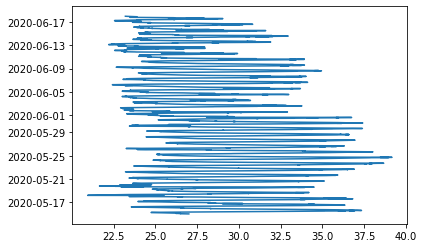

In [19]:
data0 = files[3][files[3].SOURCE_KEY == "iq8k7ZNt4Mwm3w0"]
#data0= data0.set_index('DATE_TIME')
x_values = data0['AMBIENT_TEMPERATURE']
y_values = data0['DATE_TIME']
plt1.ylim = ['01-06-2020 06:00','01-06-2020 06:00']
plt1.plot(x_values, y_values)





### Consulta 2

In [20]:
data1 = files[0][files[0].SOURCE_KEY == "adLQvlD726eNBSB"]
data1= data1.set_index('DATE_TIME')

stime = "15-05-2020 2:15"
etime = "15-05-2020 20:00"
LineChart(data1, ["DC_POWER","AC_POWER"],stime,etime,"Power Generation during para las 2:15 PM del 15 de mayo")

### Reading data

In [21]:
print('Getting all orders')

rows = table.read_rows()
for row in rows:
    print_row(row)

Getting all orders


In [22]:
print('Getting a specific column for all orders')

col_filter = row_filters.ColumnQualifierRegexFilter('product#3302'.encode())

rows = table.read_rows(filter_ = col_filter)
for row in rows:
    print_row(row)

Getting a specific column for all orders


### Deleting a row

In [ ]:
print('Getting all orders')

rows = table.read_rows()
for row in rows:
    print_row(row)

### Deleting table

In [ ]:
print('Deleting the {} table.'.format(TABLE_ID))
table.delete()

### Functions

In [ ]:
def print_row(row):
    print("Reading data for {}:".format(row.row_key.decode('utf-8')))
    for cf, cols in sorted(row.cells.items()):
        print("Column Family {}".format(cf))
        for col, cells in sorted(cols.items()):
            for cell in cells:
                labels = " [{}]".format(",".join(cell.labels)) \
                    if len(cell.labels) else ""
                print(
                    "\t{}: {} @{}{}".format(col.decode('utf-8'),
                                            cell.value.decode('utf-8'),
                                            cell.timestamp, labels))
    print("")

In [ ]:
firstName = row.cells[customer_cfId]['firstName'.encode()][0].value.decode('utf-8')
lastName = row.cells[customer_cfId]['lastName'.encode()][0].value.decode('utf-8')
customerId = row.cells[customer_cfId]['customerId'.encode()][0].value.decode('utf-8')

print(firstName + ' | ' + lastName + ' | ' + customerId)
print("\n")

for item in [k.decode('utf-8') for k in row.cells[items_cfId].keys()]:
    cell_content = row.cells[items_cfId][item.encode()][0].value.decode('utf-8')
    print(item + ' | ' + ' | '.join(cell_content.split(':')))
    
print("\n")

addressLine1 = row.cells[delivery_cfId]['addressLine1'.encode()][0].value.decode('utf-8')
addressLine2 = row.cells[delivery_cfId]['addressLine2'.encode()][0].value.decode('utf-8')
city = row.cells[delivery_cfId]['city'.encode()][0].value.decode('utf-8')
country = row.cells[delivery_cfId]['country'.encode()][0].value.decode('utf-8')

print(addressLine1 + ' | ' + addressLine2 + ' | ' + city + ' | ' + country)